![networking_skills](https://memegenerator.net/img/instances/64552892/ive-got-skills-sweet-networking-skills.jpg)


# Lab 11: Networks and Graphs and Centrality 
##### (oh my)

This weeks's lab will give you experience in netowrk analysis and visualization using the `igraph` library for python. `igraph` provides data types and functions for the implementation of several graph algorithms. 

First things first, install the igraph package in your `Computational_methods` environment. Mac and Linux users can simply run 

    conda install -c conda-forge python-igraph

Sorry windows users, but since this package requires a C compiler, installation is a bit trickier. Just follow the instructions on [igraph website](https://igraph.org/python/#pyinstall), (or consider using your VM from acculturation, since I couldn't get it to work on my windows machine...)

In [6]:
from igraph import *
#import cairocffi # You may need this to use the built in plotting function. If you get errors, consult Mr. Google

## 1 Zachary's Karate Club
The goal of this section is to "gently" explore, by example, some commonly used `igraph` functions. We will play with the "Zachary's Karate Club" dataset, a social network of friendhips between members of a karate club at a US university in the '70s. 

Unfortunately, because neutral stars with strong magnetic dipole fields can form helical dynamo action during the first few seconds after gravitational collapse, a fact circumstantially supported by the general relativistic magneto-hydro-dynamic (GRMHD) black hole accretion flow simulation of thick disks, and recently imaged by the [Event Horizon Telescope](https://iopscience.iop.org/article/10.3847/2041-8213/ab0ec7/meta), all the comments have been deleted.

Your task, should you choose to accept it, is to understand and document the following code. The [python igraph documentation](https://igraph.org/python/#docs) is quite 'extensive,' but has some good examples in the tutorial that will be useful. 

In [21]:
karate = Graph.Read_GML("daytuh/karate.gml")

In [22]:
print(karate.vcount()) # Who am I?
print(karate.ecount()) # What do I do?
print(karate.is_connected())
print(karate.is_directed())

34
78
True
False


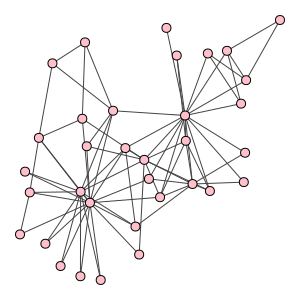

In [23]:
plot(karate, 
     vertex_size = 9, 
     vertex_color = "pink", 
     bbox=(300,300))

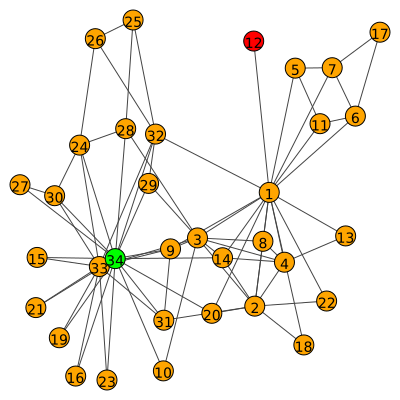

In [24]:
better_karate = karate

better_karate.vs["color"] = "orange"

d = better_karate.degree()
better_karate.vs[d.index(min(d))]["color"] = "red"#
better_karate.vs[d.index(max(d))]["color"] = "green"

layout = better_karate.layout("fr")

better_karate.vs["label"] = [int(i) for i in better_karate.vs['id']]

plot(better_karate, 
             layout = layout,
             bbox=(400,400), 
             margin = 20)

In [25]:
import pandas as pd

centrality_metrics = pd.DataFrame(
     {'vid':karate.vs['id'], 
      'deg':karate.degree(), 
      'bet':karate.betweenness(), 
      'eig':karate.evcent()}
)

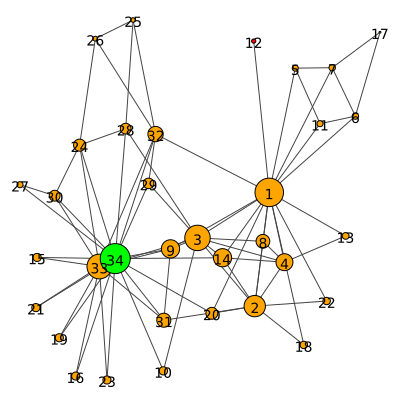

In [35]:
drawing.plot(better_karate, 
             layout = layout,
             vertex_size = centrality_metrics['eig'] * 30,
             bbox=(400,400), 
             margin = 20)

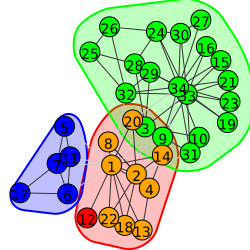

In [44]:
karate_communities = karate.community_label_propagation()
plot(karate_communities, 
     mark_groups = True, 
     bbox=(250,250))

# Try running this a couple of times. Why does the output change?

## 2 Coauthorship Network

Now that we've learned our way arund the software, we'll try to apply some of the network analysis algorithms we learend to gain insight into a so-called "Coauthorship" network" 

### 2.0 Data Description and Background
The zip archived data from the "Coauthorships in network and science" data is available both on the course website and online at [Mark Newman's network data webage](http://www-personal.umich.edu/~mejn/netdata/])[.](https://i.imgur.com/yNlQWRM.jpg) This file contains two files: `netscience.gml`, which contains the geraph data, and `netscience.txt`, which is a text file with information about the dataset. <br>
Prior to doin any analysis on the `netscience.gml` dataset, we should try to understand what kind of data we're working with. We can explore the contents by reading the author's description of the dataset and by inspecting the content of the dataset.

**Task:** Take some time to familiarize yourself with the dataset. Begin by reading the `netscience.txt` file. Now view the `netscience.gml` datafile using a text editor. 

### 2.1 Loading data

Read the dataset into python and give it an appropriate name. 

In [14]:
#### your code here ####
netsci = Graph.Read_GML("daytuh/netscience.gml")

### 2.2 Graph Structure and Statistics
Let's explore some basic structural features of the coauthorship network. The `igraph` class provides many tools for investigating statistics of a graph object. 

**Question:** How many nodes are in the graph? How many edges are in the graph? Is the graph director or undirected? Describe the degree distribution of the graph, either using plots or summary statistics. 

In [15]:
#### your code here ####
print(netsci.ecount())
print(netsci.vcount())
print(netsci.is_directed())
print(netsci.is_connected())

2742
1589
False
False


### 2.3 Mining Data About Authors
Lets start extracting some useful information from this network. In the next few sections, we'll compute and accumulate data about each of the authors in the network. You'll need a place to store this data. While there are many ways to structure this, by far the most idiomatic is to build a data frame with various columns, one for each property for authors / vertices. 

**Task:** From the graph, obtain both the numeric IDs and a character vector label for each vertex. You'll need both because on (ID) uniquely identifies the vertex in your graph data structure, while the other (label) provices human readable names (and I suppose, meaning) for the vertices. Place these in a usable data structure. 

In [16]:
attributes = pd.DataFrame({'ids':netsci.vs['id'], 'label':netsci.vs['label']})
attributes.iloc[1:10,]

,ids,label
1,1.0,"KUPERMAN, M"
2,2.0,"ACEBRON, J"
3,3.0,"BONILLA, L"
4,4.0,"PEREZVICENTE, C"
5,5.0,"RITORT, F"
6,6.0,"SPIGLER, R"
7,7.0,"ADAMIC, L"
8,8.0,"ADAR, E"
9,9.0,"HUBERMAN, B"


### 2.4 Kingpins and Corner Kids
We can us `igraph` to compute graph theoretic measures that will help identify the important authors within the network. 

**Task:** Compute the degree centrality (i.e. the degree) of all the authors, and return the top 5 authors by degree. 

In [17]:
#### your code here ####
degree_df = pd.DataFrame({'ids':netsci.vs['id'], 
                           'label':netsci.vs['label'], 
                           'degree':netsci.degree()})
degree_df.sort_values(by = 'degree', ascending = False)['label'][0:5]

33     BARABASI, A
78       NEWMAN, M
34        JEONG, H
54       OLTVAI, Z
294       YOUNG, M
Name: label, dtype: object

**Task:** Compute the betweenness centrality of all vertices and rank the authors by their decreasing betweenness centrality. What are the authors top 5 authors by this metric? Are they different than degree centrality? Why?

In [18]:
#### your code here ####
betweenness_df = pd.DataFrame({'ids':netsci.vs['id'], 
                           'label':netsci.vs['label'], 
                           'betweenness':netsci.betweenness()})
betweenness_df.sort_values(by = 'betweenness', ascending = False)['label'][0:5]

78             NEWMAN, M
150    PASTORSATORRAS, R
516            MORENO, Y
281              SOLE, R
216        BOCCALETTI, S
Name: label, dtype: object

### 2.5 Community Detection
Community detection, especially in complex networks, is an ongoing and fecund subfield of network science research. One of the oldest and "Classic" algorithms used for community detection is the Girvan-Newman Algorithm, as discussed in the reading. It is implemented as the `community_edge_betweenness` method from the `GraphBase` class. 

**Task:** Use the Girvan-Newman algorithm to choose communities of authors, then plot the network, coloring by community. The function can decide what the optimal number of communities is, but try specifying some different sizes. <br> There are many sparsely connected authors, so first you should get a subgraph that contains the largest connected component. 

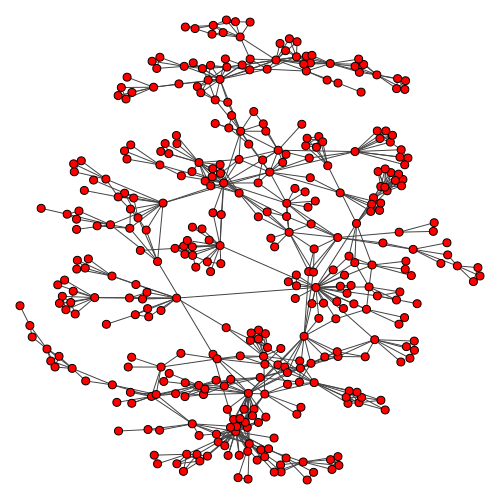

In [19]:
#### your code here ####
big_netsci = netsci.clusters().giant()
plot(big_netsci, bbox = (500,500), vertex_size = 8, vertex_label_size = 0)

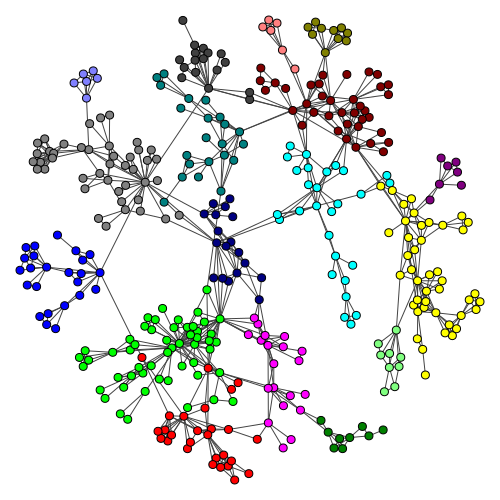

In [20]:
communities = big_netsci.community_edge_betweenness()
clusters = communities.as_clustering()


pal = drawing.colors.ClusterColoringPalette(len(clusters.sizes()))
big_netsci['color'] = pal.get_many(clusters.membership)
plot(big_netsci, bbox = (500,500),
     vertex_label_size = 0, 
     vertex_size = 8, 
     vertex_color = big_netsci['color'])